# Project. Research of advertisements for the sale of apartments

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring areas for several years.We should learn how to determine the market value of real estate. Our job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Lets open the data file and study the general information.

In [127]:

import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
df = pd.read_csv('C:/Users/sony/Downloads/real_estate_data.csv', sep='\t')

In [128]:
# lets fill Nans by 'неизвестно' 
df['locality_name'] = df['locality_name'].fillna('неизвестно')
# create a category for settlements
df['locality_name_category'] = 'Другое'
df.loc[df['locality_name'] == 'Санкт-Петербург', 'locality_name_category'] = 'Санкт-Петербург'
# convert first_day_exposition to date-time format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format=('%Y-%m-%dT%H:%M:%S'))
# add month column
df['month'] = df['first_day_exposition'].dt.month
# add a column with the year
df['year'] = df['first_day_exposition'].dt.year

In [129]:
# Plot Hist
fig = px.histogram(df,
                   x='total_area', 
                   color='locality_name_category', 
                   range_x=[0, 200],
                   title='Distribution of the total area of ​​the apartment depending on the location',
                   nbins=1000,
                   barmode='overlay') 
fig.update_xaxes(title_text='Value')
fig.update_yaxes(title_text='Frequency')
fig.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            2775 non-null   object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

In [131]:
pd.options.display.max_columns = 22
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,month,year
15486,17,3800000.0,52.0,2019-02-24,1,2.55,10.0,29.0,2,NaN,False,...,Санкт-Петербург,19308.0,22733.0,0.0,NaN,2.0,267.0,NaN,Санкт-Петербург,2,2019
11923,11,12750000.0,78.1,2018-08-01,3,2.83,7.0,44.5,2,NaN,False,...,Санкт-Петербург,15820.0,8084.0,2.0,563.0,3.0,864.0,7.0,Санкт-Петербург,8,2018
4698,9,3150000.0,31.2,2019-02-09,1,2.50,5.0,18.0,2,NaN,False,...,Санкт-Петербург,42099.0,14603.0,1.0,365.0,0.0,NaN,3.0,Санкт-Петербург,2,2019
8875,10,1350000.0,58.0,2017-07-27,2,NaN,9.0,29.0,1,NaN,False,...,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,416.0,Другое,7,2017
12997,8,2680000.0,42.4,2017-02-16,1,NaN,10.0,17.0,3,NaN,False,...,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,637.0,Другое,2,2017


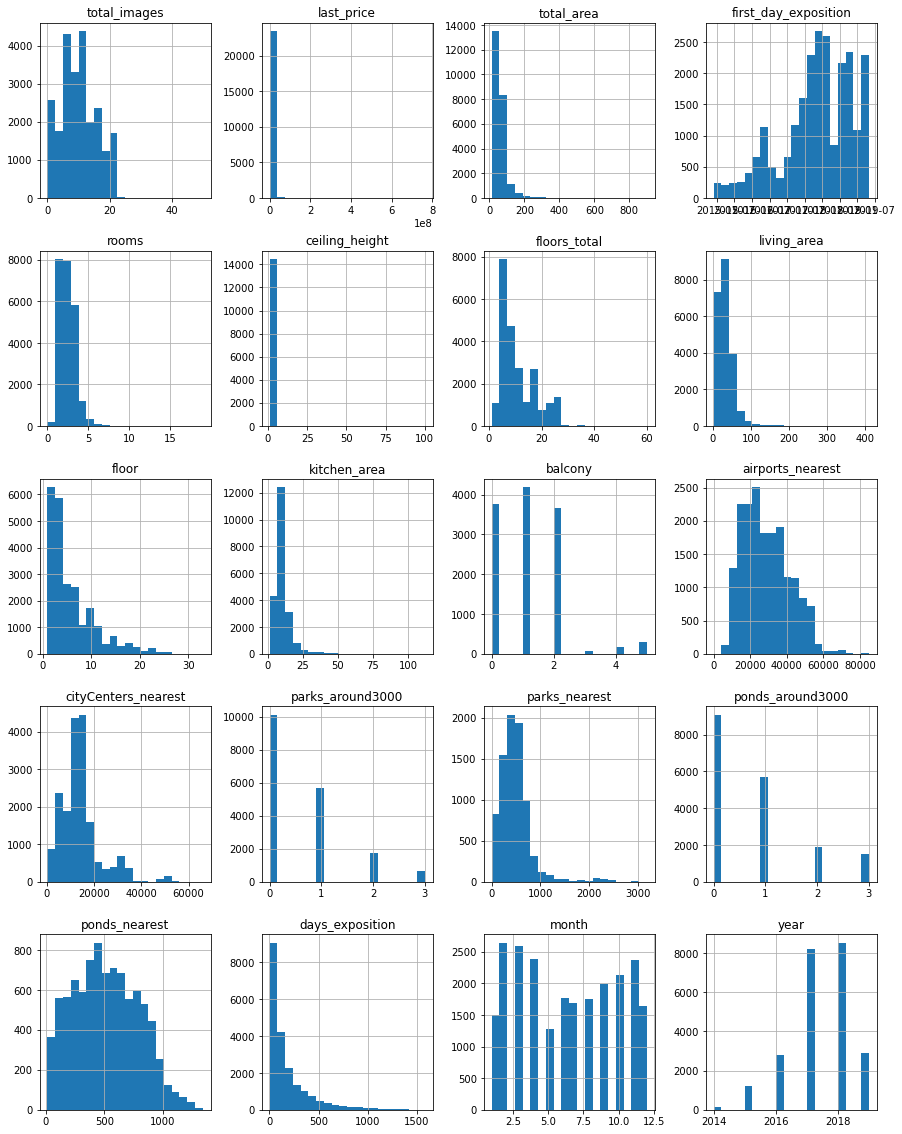

In [132]:
import matplotlib.pyplot as plt
df.hist( bins= 20, figsize=(15, 20));

In [133]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month,year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,12.000000,2019.000000


# conclusion
 
 1. Many Nans were found in the Dataset
 2. it makes sense to put the column names in snake case, some look incorrect
 3. data types need to be changed in some columns
 4. Abnormal values ​​are visible, we need to figure it out.


### Data preprocessing

In [134]:
#replace the column name with a more convinient
df = df.rename(columns= {'cityCenters_nearest':'city_centers_nearest'})
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Другое,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,6,2018


In [135]:
#check for Nans and sort in descending order
df.isna().mean().sort_values(ascending= False)

is_apartment              0.882906
parks_nearest             0.659100
ponds_nearest             0.615596
balcony                   0.486054
ceiling_height            0.387991
airports_nearest          0.233850
city_centers_nearest      0.232879
ponds_around3000          0.232837
parks_around3000          0.232837
days_exposition           0.134225
kitchen_area              0.096122
living_area               0.080299
floors_total              0.003629
month                     0.000000
locality_name_category    0.000000
total_images              0.000000
locality_name             0.000000
last_price                0.000000
open_plan                 0.000000
studio                    0.000000
floor                     0.000000
rooms                     0.000000
first_day_exposition      0.000000
total_area                0.000000
year                      0.000000
dtype: float64

In [136]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [137]:
#check unique values
df.sort_values('locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [138]:
#проверим наличие дубликатов  в Датафрейме
df.duplicated().sum()

0

In [139]:
df['locality_name'].value_counts()

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: locality_name, Length: 365, dtype: int64

In [140]:
#Get rid of implicit duplicates
df['locality_name'] = df['locality_name'].str.lower()

In [141]:
#replace ё on е to eliminate implicit duplicates
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [142]:
df.sort_values('locality_name')['locality_name'].value_counts()

санкт-петербург                          15721
поселок мурино                             556
поселок шушары                             440
всеволожск                                 398
пушкин                                     369
                                         ...  
деревня хапо-ое                              1
деревня хязельки                             1
деревня чудской бор                          1
деревня шпаньково                            1
поселок городского типа большая ижора        1
Name: locality_name, Length: 331, dtype: int64

In [143]:
#check if processing implicit duplicates helped
len(df['locality_name'].unique())

331

In [144]:
#let's unite with the help of the replacement of the PGT and the urban village in order to exclude repetitions
df['locality_name'] = df['locality_name'].replace('городской поселок','поселок городского типа', regex=True)

In [145]:
len(df['locality_name'].unique())

324

In [146]:
df['locality_name'].isna().sum()

0

In [147]:
#I think it is worth removing the rows without the name of locality
df = df.dropna(subset=['locality_name'])

In [148]:
df['locality_name'].isna().sum()

0

In [149]:
#check Nans in column balconies
df['balcony'].isna().sum()

11519

In [150]:
df['balcony'] = df['balcony'].fillna(value= 0)

In [151]:
df['balcony'].isna().sum()

0

In [152]:
df['balcony'] = df['balcony'].astype('int')

In [153]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [154]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,...,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Другое,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,6,2018


In [155]:
#remove Nans in column distance to center
df['city_centers_nearest']  = df['city_centers_nearest'].fillna(df.groupby(['locality_name'])['city_centers_nearest'].transform('median')) 

In [156]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby(['locality_name'])['airports_nearest'].transform('median'))

In [157]:
#Change the distance in the desired columns from meters to kilometers
def km (col1):
    new = []
    for col in col1:
        new.append(col/1000)
    return new    

In [158]:
df['city_centers_nearest'] = km(df['city_centers_nearest'])
df['parks_nearest'] = km(df['parks_nearest'])
df['airports_nearest'] = km(df['airports_nearest'])
df['ponds_nearest'] = km(df['ponds_nearest'])


In [159]:
df['kitchen_area'].dropna()

0        25.00
1        11.00
2         8.30
4        41.00
5         9.10
         ...  
23693     8.00
23694    13.83
23695     8.50
23697    23.30
23698     9.00
Name: kitchen_area, Length: 21421, dtype: float64

 <span style="color: green">**I think that it makes no sense to fill in the gaps with a median value, since most likely the area of the kitchen may depend on the size of the apartment, layout, which house, and so on. by replacing the gaps with the median value, we can skew the data. or search for the median of the grouped data on the total area, taking into account the dependence on the layout, etc.** 

In [160]:
#fill in the Nans in the ceiling height column by the median value
df ['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


<span style="color:green">  ***I think that there is nothing wrong with that, most apartments have approximately the same ceiling height and I assume that this factor does not greatly affect the cost of the apartment.*** 

In [161]:
#large numbers in a column are most likely the result of a data entry error, 

df['ceiling_height'] = df['ceiling_height'].replace({
    25.0: 2.5,
    27.0: 2.7,
    32.0: 3.2,
    24.0: 2.4,
    26.0: 2.6,
    20.0: 2.0,
    27.5: 2.75,
    22.6: 2.26
})

In [162]:
#replace Nans in days_exposition and change data type
df['days_exposition'] = df['days_exposition'].fillna(55555).astype('int')

In [163]:
df['last_price'] = df['last_price'].astype('int')
df['last_price'].sample(5)

11380    8300000
10906    3970000
4098     4160000
20642    2200000
10099    4400000
Name: last_price, dtype: int32

### Count and add new columns to the table

In [164]:
#Add a column and calculate the price per square meter
df['price_per_square'] = df['last_price'] / df['total_area']

In [165]:
#Add columns with day, month and year
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [166]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,month,year,price_per_square,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,0.482,2.0,0.755,55555,Санкт-Петербург,3,2019,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,...,NaN,0.0,NaN,81,Другое,12,2018,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,...,0.090,2.0,0.574,558,Санкт-Петербург,8,2015,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,...,0.084,3.0,0.234,424,Санкт-Петербург,7,2015,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,0.112,1.0,0.048,121,Санкт-Петербург,6,2018,100000.000000,1,6,2018


In [167]:
# Добавим этажи
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [168]:
df['floor_group'] = df.apply(floor_group, axis=1)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_category,month,year,price_per_square,day_of_week_exposition,month_exposition,year_exposition,floor_group
20879,5,4190000,36.95,2015-12-18,1,2.65,11.0,16.5,5,NaN,False,...,2.0,0.210,713,Санкт-Петербург,12,2015,113396.481732,4,12,2015,другой
1820,9,5600000,55.10,2018-12-18,2,2.70,9.0,31.0,3,NaN,False,...,0.0,NaN,116,Санкт-Петербург,12,2018,101633.393829,1,12,2018,другой
23490,0,1800000,64.00,2018-02-07,3,2.65,9.0,NaN,6,NaN,False,...,NaN,NaN,45,Другое,2,2018,28125.000000,2,2,2018,другой
4022,7,7548000,79.00,2018-03-23,3,2.65,25.0,47.0,12,NaN,False,...,0.0,NaN,98,Санкт-Петербург,3,2018,95544.303797,4,3,2018,другой
18149,1,3900000,37.00,2018-01-17,1,2.65,10.0,17.0,4,NaN,False,...,1.0,0.564,16,Санкт-Петербург,1,2018,105405.405405,2,1,2018,другой


In [169]:
df['city_centers_nearest'] = df['city_centers_nearest'].round(decimals=3)

### We will conduct an exploratory data analysis

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

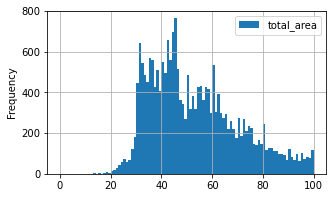

In [170]:
#study the total area
df
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
df['total_area'].describe()

<span style="color:green">**the distribution of the data is normal, there are outliers but they do not greatly affect the data. The maximum number of apartments in the region of 40 square meters seems to be true, since these are the most common 1-2 room apartments.**

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

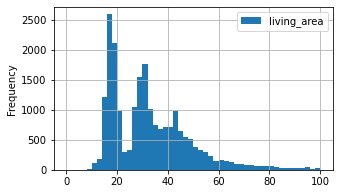

In [171]:
#explore living area
df.plot(y = 'living_area', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,100))
df['living_area'].describe()

<span style="color:green">**the distribution is normal, we see peaks of 18, 30 and 50 meters, which corresponds to the living area of ​​one, two and three-room apartments, respectively**

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

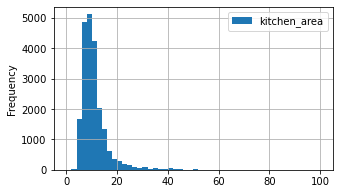

In [172]:
# Lets study the area of the kitchen
df.plot(y = 'kitchen_area', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,100))
df['kitchen_area'].describe()

<span style="color:green">**Nothing suspicious, the maximum number is in the region of 7-9 meters.**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

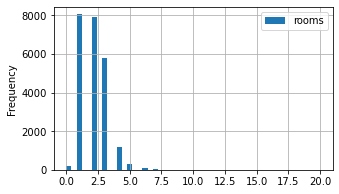

In [173]:
#study the data on the number of rooms
df.plot(y = 'rooms', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,20))
df['rooms'].describe()

<span style="color:green">**it seems to be true, the maximum number is 1-2 room apartments. Values ​​around 0 most likely indicate that this is either a studio or an open floor plan.**

<AxesSubplot:xlabel='floor_group'>

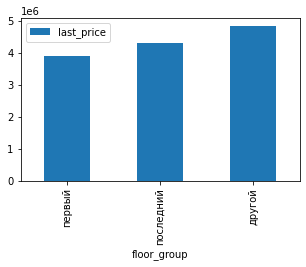

In [174]:
#we will study the cost depending on the floor
df.pivot_table(index='floor_group', values='last_price', aggfunc='median').sort_values(by='last_price').plot(y='last_price', kind='bar', figsize=(5, 3))

<span style="color:green">**We see that the first and last floors are cheaper**

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

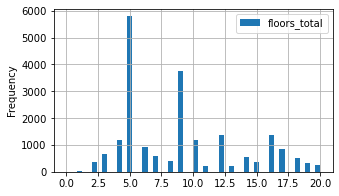

In [175]:
#Иwe learn data on floors in houses
df.plot(y = 'floors_total', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,20))
df['floors_total'].describe()

<span style="color:green">**We see a normal distribution, most of all 5 floors and a large number of 9-12-16 floors. Soviet legacy**

count    18835.000000
mean        14.441625
std          8.596877
min          0.181000
25%          9.464000
50%         13.261000
75%         16.735000
max         65.968000
Name: city_centers_nearest, dtype: float64

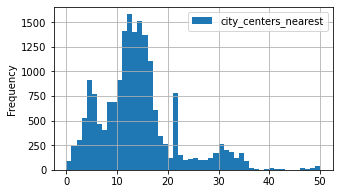

In [176]:
#Distance to city center
df.query(' city_centers_nearest != 999999 ').plot(y = 'city_centers_nearest', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,50))
df['city_centers_nearest'].describe()

<span style="color:green">**data is good, the value of the mean is close to the median. There are also outliers, but the study is not greatly affected** 

count    18835.000000
mean        29.489960
std         13.038283
min          0.000000
25%         18.814000
50%         27.148000
75%         38.498000
max         84.869000
Name: airports_nearest, dtype: float64

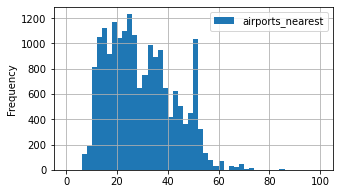

In [177]:
#study the distance to the airport
df.plot(y = 'airports_nearest', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,100))
df['airports_nearest'].describe()

<span style="color:green">**There are many Nans in the data, perhaps this is due to the fact that the owners do not know the distance to the airport. I see no reason to replace Nans with the mean or median value.**

count    8079.000000
mean        0.490805
std         0.342318
min         0.001000
25%         0.288000
50%         0.455000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

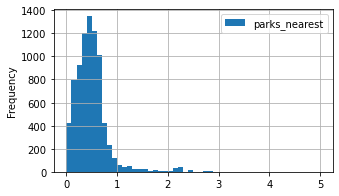

In [178]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 50,grid=True, figsize =(5,3),range=(0,5))
df['parks_nearest'].describe()

<span style="color:green">**the distribution looks normal. there are a lot of passes, probably the owners do not consider it necessary to indicate this information or do not know about the nearest parks**

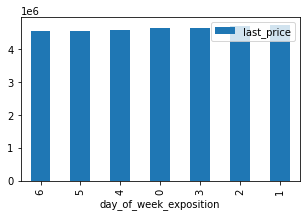

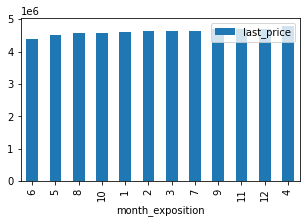

In [179]:
#Build plot by month and day of add publication
data_list_of_columns = ['day_of_week_exposition', 'month_exposition']

for name in data_list_of_columns:
    df.pivot_table(index=name, values='last_price', aggfunc='median').sort_values(by='last_price').plot(y='last_price', kind='bar', figsize=(5, 3))

<span style="color:green">**There is no significant difference between the days of the week or the month of submission of ads.** 

55555    3181
45        880
60        538
7         234
30        208
90        204
4         176
3         158
5         152
14        148
Name: days_exposition, dtype: int64

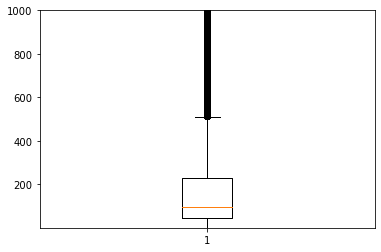

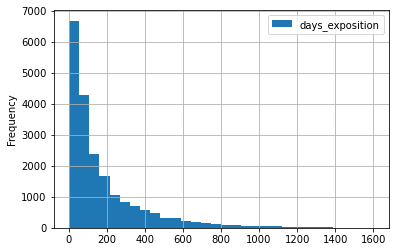

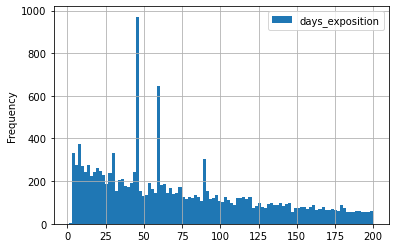

In [180]:
#range diagram
import matplotlib.pyplot as plt
plt.boxplot(df[(df['days_exposition']!=0) & (df['days_exposition']!= 55555)]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))


df[df['days_exposition']!=0]['days_exposition'].value_counts().head(10)

 # вывод
<span style="color:green">**according to the histogram - we have a Poisson distribution. The mean is 180 days and the median is 95 days. Having made a histogram with values from 0 to 200 with a number of baskets of 100, we found outlier values ​​and using the value_counts method we made sure of this - we have anomalies at 45, 60, 7, 30, 90 days - this is the most popular number of days before the ad is removed.**

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

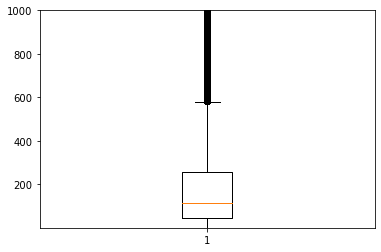

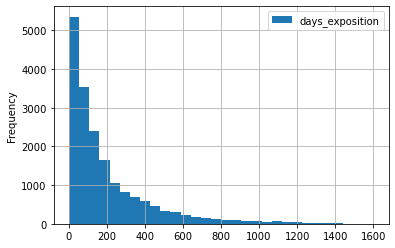

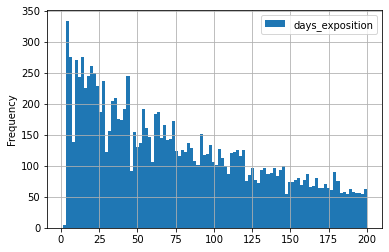

In [181]:
#filter the data from anomalies and write them to a new good_data dataframe
good_data = df.query('days_exposition != 45 and days_exposition !=55555  and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

# range diagram
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

#Hists
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

good_data['days_exposition'].describe()

<span style="color:green">***Conclusion: in the cleaned data, in values less than the median, we get larger values ​​of the median and mean - 114 and 195, respectively, instead of 95 and 180. Similarly, now the normal values ​​range from 1 to 600 days instead of from 1 to 500 days.***

#### we will study the dependence of the price per square meter on the total cost of the apartment

0.3019602100147256

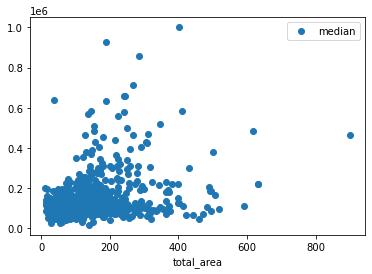

In [182]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square'])

<span style="color:green">**Conclusion: we see that the dependence is very weak - according to the Pearson correlation - 0.3. That is, the larger the area, the slightly higher the cost.**

0.6536750579657251

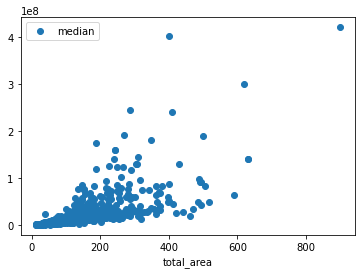

In [183]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['last_price'])

#### we will study the dependence of the price per square meter on the number of rooms

0.05541965593528798

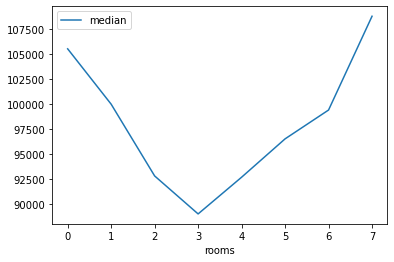

In [184]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square'])

<span style="color:green">***Conclusion: the closer the number of rooms to 3, the lower the cost per square meter.***

#### We will study the dependence of the price per square meter on the floor (first or last)

,mean,count,median
floor_group,,,
первый,81983.559279,2917,81223.628692
последний,93410.716254,3336,87777.777778


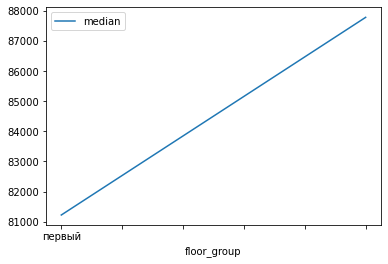

In [185]:
pivot_table_floor_group = df.query('floor_group != "другой"').pivot_table(index = 'floor_group', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_group.columns = ['mean', 'count', 'median']
pivot_table_floor_group.plot(y = 'median')
pivot_table_floor_group

<span style="color:green"> ***As a rule, apartments on the first floor are cheaper than apartments on the top floor - by an average of 10%.***

#### We will study the dependence of the price per square meter on the distance from the center.

-0.3257502573112347

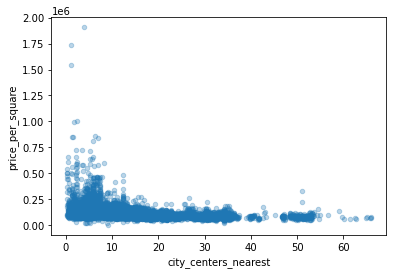

In [186]:
df.plot(kind = 'scatter', y = 'price_per_square', x = 'city_centers_nearest', alpha = 0.3)

df['city_centers_nearest'].corr(df['price_per_square'])

<span style="color:green">***Conclusion: we see a clear dependence of the cost per square meter on the proximity to the center. The closer to the center, the higher the cost.***

#### We will study the dependence of the price per square meter on the date of placement: the day of the week

,mean,count,median
day_of_week_exposition,,,
1,99734.539194,4183,95634.095634
2,99617.181736,3974,95473.807179
3,100162.906153,4295,95143.884892
0,99438.432027,3612,94688.910380
4,99012.143458,4000,94616.160238
6,97708.373982,1699,94501.718213
5,99018.170245,1936,93545.716727


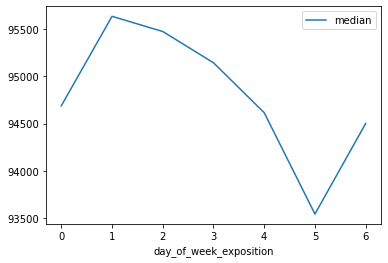

In [187]:
pivot_table_day_of_week_exposition = df.pivot_table(index = 'day_of_week_exposition', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_week_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_of_week_exposition.plot(y = 'median')

pivot_table_day_of_week_exposition.sort_values('median', ascending = False)

<span style="color:green">**Conclusion: We see a higher number at the beginning of the week and a minimum at the weekend.** 

####We will study the dependence of the price per square meter on the date of placement: months.

,mean,count,median
month_exposition,,,
2,98768.735441,2640,95000.000000
3,98973.216068,2587,95238.095238
4,101949.026219,2379,96451.612903
11,99230.870836,2371,95588.235294
10,97933.895863,2127,94202.898551
9,100464.271234,1981,95607.235142
6,97763.317183,1760,92799.539171
8,100110.528446,1744,96026.315789
7,99625.641509,1695,95000.000000


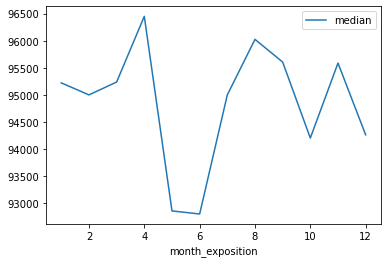

In [188]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('count', ascending = False)

<span style="color:green">**Conclusion: the highest cost per meter is in April and August. The lowest price is in May and June. Here, as in the previous task, I would not look at the relationship between cost and time, but at the relationship of the month with the number of offers and purchasing activity. Traditionally, before the new year and in January, we observe a decline in activity, just like in the middle of summer. I associate this with the season of long holidays and weekends. Therefore, the peak of activity occurs in spring and early autumn.**

#### Let's study the dependence of the price per square meter on the date of placement: years.

,mean,count,median
year_exposition,,,
2014,124830.426426,137,107000.000000
2019,107123.780305,2879,103305.785124
2018,97773.557999,8519,95689.655172
2015,104614.200153,1191,93414.634146
2017,97621.876525,8190,92565.088448
2016,98322.343248,2783,91743.119266


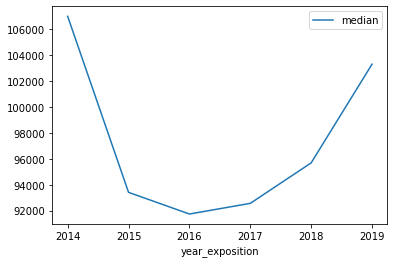

In [189]:
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_square', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

<span style="color:green">**Conclusion: we see that from 2014 to 2016 the price fell, but then it began to increase. We do not consider market segmentation and, in fact, the cost of similar apartments could behave completely differently from year to year. There is a real example in the output. I also want to note that the real estate market is very inert, but it is also significantly influenced by such factors as the availability of mortgages, purchasing power, the number of housing offered, the cost of construction, possible financial crises that affect effective demand. therefore, we can notice the dynamics over the years and not see it in short-term intervals.**

,mean,count,median
year_exposition,,,
2014,86.249854,137,76.26
2015,71.558371,1191,60.00
2016,62.156144,2783,53.10
2017,60.759249,8190,52.00
2019,59.467864,2879,52.00
2018,57.677386,8519,50.50


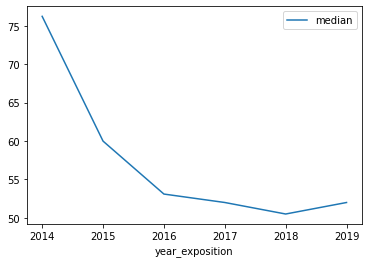

In [190]:
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

<span style="color:blue"> **So, indeed, we see that the area of ​​the proposed apartments has decreased. But since apartments do not decrease over time, and people still live in 2, 3, 4, etc. room apartments, I assume that such dynamics is associated with an increase in the supply of smaller apartments. If you look at 2016-18, where there is the largest number of offers, I would venture to link this dynamics with the growth of offers for new buildings, where one-room apartments or studio apartments are common. and most likely the same factor is associated with the rise in prices, which is inherent in new homes. we can say that from 16 to 19 we are witnessing a "construction boom"** 

### Let's select 10 settlements with the largest number of ads. Let's calculate the average price per square meter in these localities.

<AxesSubplot:xlabel='locality_name'>

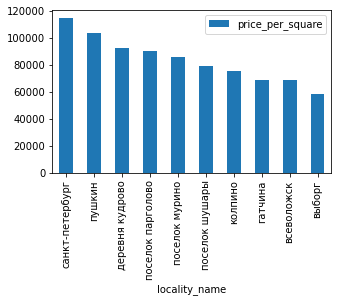

In [191]:
(df.pivot_table(index='locality_name', aggfunc={'last_price':'count', 'price_per_square':'mean'})  
 .sort_values(by='last_price', ascending=False).head(10)  
 .sort_values(by='price_per_square', ascending=False)
 .plot(y='price_per_square', kind='bar', figsize=(5, 3))
)

In [192]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square', aggfunc=['count', 'median'])
locality_pivot_table.columns = ['count', 'median']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table['median'].sort_values(ascending= False)


locality_name
санкт-петербург      104761.904762
пушкин               100000.000000
деревня кудрово       91860.465116
поселок парголово     91642.857143
поселок мурино        85878.462169
поселок шушары        76876.172608
колпино               74723.748474
гатчина               67796.610169
всеволожск            65789.473684
выборг                58158.319871
Name: median, dtype: float64

<span style="color:green">**Conclusion: the highest cost of housing out of 10 settlements with the highest incomes is in St. Petersburg, while the lowest cost is in Vyborg.**

#### select apartments in St. Petersburg using the locality_name column and calculate the average price for each kilometer. 

,price_per_square
city_centers_nearest,
0,187324.130319
1,166603.755531
2,146662.860056
3,129416.344615
4,137475.497055
5,146979.232519
6,152277.893519
7,141399.731456
8,120581.349830


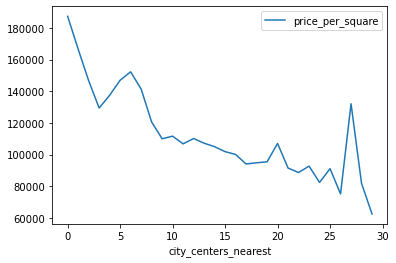

In [193]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(999999)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
pivot_table_km = df.query('locality_name == "санкт-петербург" and city_centers_nearest !=999999').pivot_table(index = 'city_centers_nearest', values = 'price_per_square', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

<span style="color:green">**We can see a peak with a large number of values ​​and a maximum price in the region of 6 kilometers from the center. We will assume that the area within a radius of six kilometers from the center is the central part of the city. Accordingly, we observe a price decrease in direct proportion to the distance from the center. except for a few peaks, perhaps these are some elite areas.**

 # General conclusion

**We processed the provided dataset - excluded missing values ​​where necessary, replaced the data types with the ones necessary for further work. We calculated and added to the table the price per square meter of housing, deduced the days of the week, months and years of placement of ads from the date, added the categories of the number of storeys of apartments. We studied the parameters for the presence of emissions, such as the area of ​​​​the apartment, price, number of rooms, ceiling height. Identified anomalies in these parameters. Studying the time of the sale of apartments, we found that a large number of ads were automatically removed from Yandex Real Estate and we excluded the dates of removal of the ad in order not to distort the data. We have found from the box plot that normal apartment sales range from 1 to 600 days.We found that the cost per square meter of an apartment is most affected by the number of rooms, the floor of the apartment, and proximity to the center. The cost per square meter is slightly affected by the day, month of placement and the total area. Studying the change in prices depending on the distance from the center, we determined the center of St. Petersburg in the Radius of 6 km.**